In [15]:
import cv2
import numpy as np
import time
from skimage.io import imshow,imread
from scipy import ndimage as ndi
from skimage import feature
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

# image = imread('./dataset/1.jpg')
# imshow(image)

In [16]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


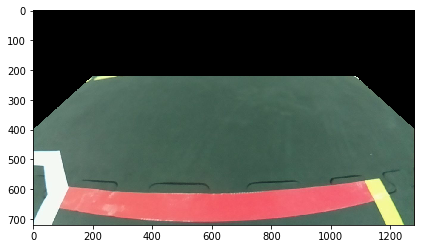

In [17]:
url='../video/video1.mjpeg'
cap = cv2.VideoCapture(url)
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
#     gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    
    height=frame.shape[0]
    width=frame.shape[1]
    region_of_interest_vertices = [   
        (0, height),
        (0, height-320),
        (200, height-500),

        (width-200, height-500),
        (width, height-320),
        (width, height)]


    cropped_image = region_of_interest(frame,np.array([region_of_interest_vertices], np.int32))
    img = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    lowerY=np.array([230,230,110])
    upperY=np.array([250,250,204])    
    maskY = cv2.inRange(img, lowerY, upperY)
    lowerW=np.array([231,231,231])
    upperW=np.array([255,255,255])    
    maskW = cv2.inRange(img, lowerW, upperW)
    mask = maskY+maskW
    cv2.imshow('frame', mask)

    imshow(img)
    
#     time.sleep(.100)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()